In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.errors import ShapelyDeprecationWarning
import warnings
plt.rcParams['figure.figsize'] = [12, 12]  # add more space to figures

In [55]:
vtds = gpd.read_file('geo/MI_VTDs_2020/MI_VTDs_2020.shp')

<AxesSubplot:>

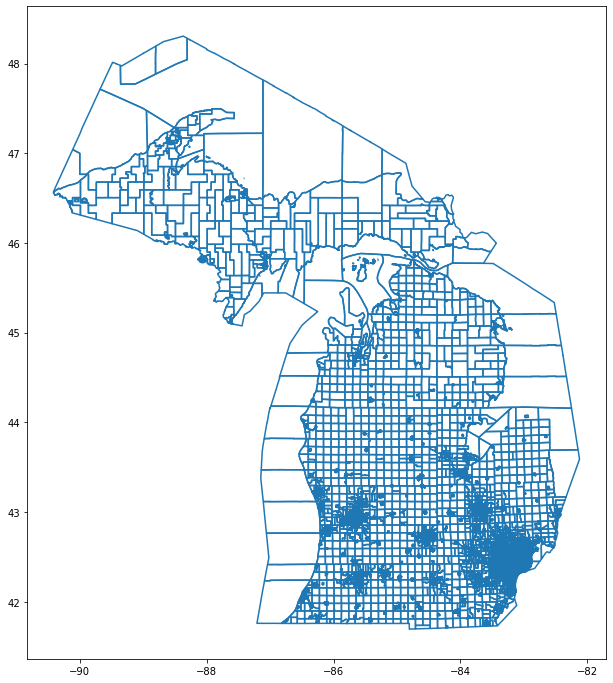

In [10]:
vtds.boundary.plot()

In [51]:
vtds

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,VTDI20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,26,003,003001,26003003001,A,0030446000001,Voting District 0030446000001,V1,G5240,N,366843585,43425964,+46.3380932,-086.7739238,"MULTIPOLYGON (((-86.72267 46.48484, -86.72254 ..."
1,26,003,003007,26003003007,A,0035622000001,Voting District 0035622000001,V1,G5240,N,523821819,40068222,+46.4024760,-086.5105746,"POLYGON ((-86.67879 46.38334, -86.67877 46.383..."
2,26,003,003010,26003003010,A,0036916000001,Voting District 0036916000001,V1,G5240,N,208983301,652387,+46.3468839,-086.9948981,"POLYGON ((-87.11651 46.39118, -87.10728 46.391..."
3,26,003,003005,26003003005,A,0035236000001,Voting District 0035236000001,V1,G5240,N,183058104,3482479,+46.2149640,-086.8698593,"POLYGON ((-86.99081 46.23156, -86.99077 46.235..."
4,26,003,003009,26003003009,A,0036082000001,Voting District 0036082000001,V1,G5240,N,227225602,41073935,+46.4536416,-086.9688367,"POLYGON ((-87.11662 46.49507, -87.11651 46.499..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,26,159,159030,26159159030,A,1597498003001,Voting District 1597498003001,V1,G5240,N,2389384,239250,+42.4100351,-086.2719092,"POLYGON ((-86.28833 42.40196, -86.28440 42.402..."
4801,26,159,159032,26159159032,A,1597500000002,Voting District 1597500000002,V1,G5240,N,14825524,49380,+42.3503387,-086.2867211,"POLYGON ((-86.31115 42.33167, -86.31076 42.332..."
4802,26,159,159019,26159159019,A,1593696000001,Voting District 1593696000001,V1,G5240,N,3519795,12686,+42.2049586,-086.1661221,"POLYGON ((-86.17657 42.21501, -86.16929 42.215..."
4803,26,159,159002,26159159002,A,1590160000002,Voting District 1590160000002,V1,G5240,N,37663589,670801,+42.3010102,-085.8127518,"MULTIPOLYGON (((-85.82390 42.24556, -85.82384 ..."


In [52]:
vtds.VTDST20.nunique()

4752

In [57]:
vtds = vtds.dissolve(by="VTDST20").reset_index()  # combine VTD areas that have same name
vtds = vtds.rename(columns={"VTDST20":"VTD_ID"})  # rename identifying column for simplicity

In [39]:
bgs = gpd.read_file('MI_ACS5_2019_bg/MI_ACS5_2019_bg.shp')

<AxesSubplot:>

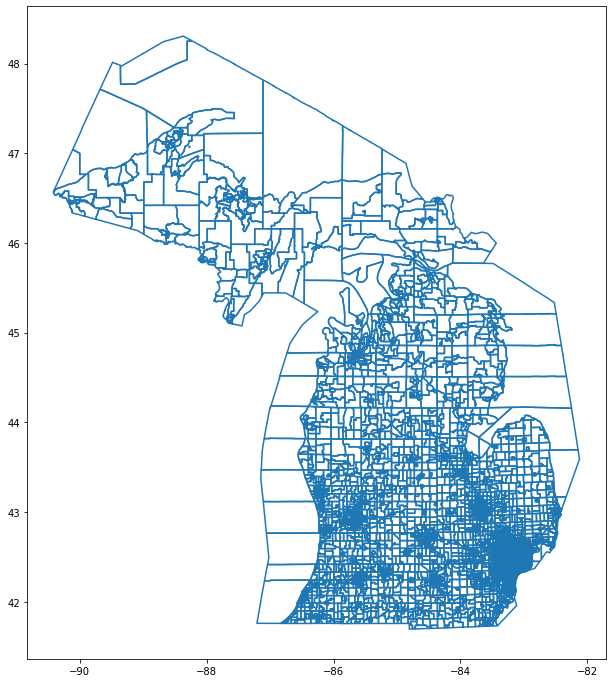

In [40]:
bgs.boundary.plot()

In [41]:
len(bgs)

8205

In [42]:
bgs.GEOID.nunique()

8205

In [20]:
bgs.columns

Index(['GEOID', 'NAME', 'STATE', 'COUNTY', 'TOTPOP19', 'TOTPOPMOE', 'N_HISP19',
       'N_HISPMOE', 'WHT_NH19', 'WHT_NHMOE', 'BLK_NH19', 'BLK_NHMOE', 'HISP19',
       'HISPMOE', 'WHT_H19', 'WHT_HMOE', 'BLK_H19', 'BLK_HMOE', 'BLK_ALL19',
       'BLK_ALLMOE', 'AIA_ALL19', 'AIA_ALLMOE', 'ASN_ALL19', 'ASN_ALLMOE',
       'NHP_ALL19', 'NHP_ALLMOE', 'OTH_ALL19', 'OTH_ALLMOE', 'STATEFP',
       'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'geometry'],
      dtype='object')

In [43]:
bgs = bgs.rename(columns={"GEOID":"BG_ID"})  # rename identifying column for simplicity

In [25]:
def simple_map(data,boundary=True,variable=None,title=None):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
        # For some reason, below line prints deprecation warning for some but not all geometries
        # ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0.
        if variable is not None:
            fig = data.plot(column=variable,legend=True)
            if title is None:
                title = variable
        elif boundary:
            fig = data.boundary.plot()
        else:
            fig = data.plot()
        if title is not None:
            plt.title(title)
        return fig

/var/folders/h2/1dptmntx7cqcbm48dz37csk00000gn/T/ipykernel_84527/3938008306.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 32956 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  overlap = gpd.overlay(vtds,bgs,how='union')


<AxesSubplot:title={'center':'Unique VTD-BG Combinations'}>

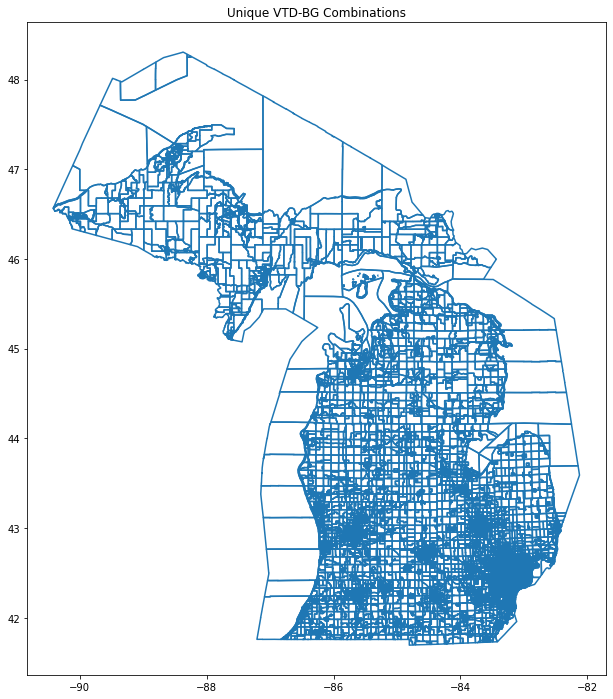

In [59]:
# We will use geopandas' spatial join function
# See https://geopandas.org/en/stable/docs/user_guide/set_operations.html
# We will first take the union of vtds and bgs. Every resulting geometry is a unique combination of vtds/bgs that overlap
# (or the area of each vtd/bg that doesn't overlap, if nonzero)

# warning: slow, like ~40 seconds

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    overlap = gpd.overlay(vtds,bgs,how='union')
overlap['area'] = overlap.apply(lambda row: row.geometry.area,axis=1)  # force-recalculate areas
simple_map(overlap,boundary=True,title="Unique VTD-BG Combinations")

Text(0.5, 1.0, 'BGs per VTD')

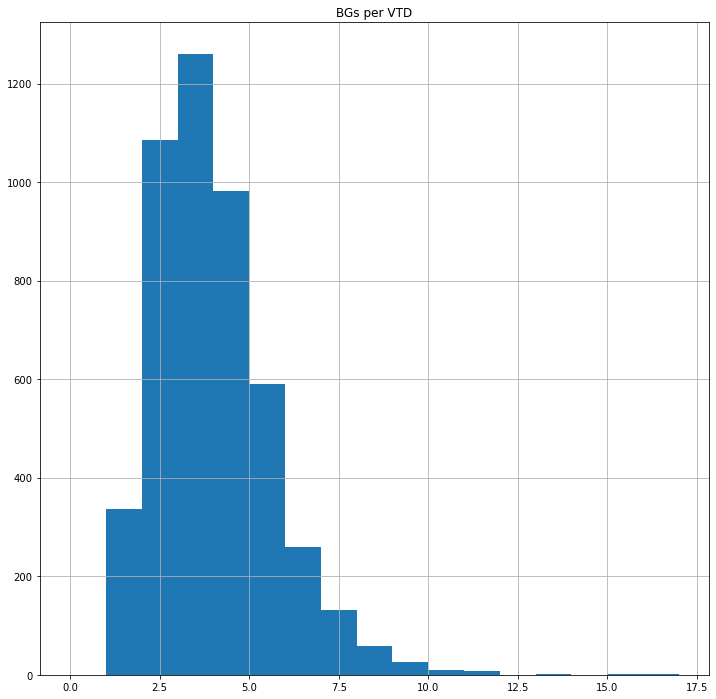

In [62]:
# calculate number of bgs overlapping with each VTD
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    bgs_per_vtd = overlap.groupby('VTD_ID').nunique()[["BG_ID"]]
bgs_per_vtd.hist(bins=range(0,18))
plt.title('BGs per VTD')